<a href="https://colab.research.google.com/github/BAravind-5/Task_8/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
from sklearn.datasets import fetch_openml

bank = fetch_openml(name='bank-marketing', version=1, as_frame=True)
df = bank.frame
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  int64   
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  int64   
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  int64   
 10  V11     45211 non-null  category
 11  V12     45211 non-null  int64   
 12  V13     45211 non-null  int64   
 13  V14     45211 non-null  int64   
 14  V15     45211 non-null  int64   
 15  V16     45211 non-null  category
 16  Class   45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [ ]:
df.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,1
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


The dataset contains customer demographic and campaign-related features.
The target variable 'y' indicates whether the customer subscribed to a term deposit.

In [ ]:
df = df.replace('unknown', pd.NA)

/tmp/ipython-input-1187102798.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('unknown', pd.NA)


In [ ]:
df.isnull().sum()

,0
V1,0
V2,288
V3,0
V4,1857
V5,0
V6,0
V7,0
V8,0
V9,13020
V10,0


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class'].map({'1': 1, '0': 0})

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,V1,V6,V10,V12,V13,V14,V15,V2_blue-collar,V2_entrepreneur,V2_housemaid,...,V11_jan,V11_jul,V11_jun,V11_mar,V11_may,V11_nov,V11_oct,V11_sep,V16_other,V16_success
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows where y is NaN
not_nan_indices = y.dropna().index
X_cleaned = X.loc[not_nan_indices]
y_cleaned = y.loc[not_nan_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned,
    test_size=0.2,
    random_state=42,
    stratify=y_cleaned
)

Stratified splitting preserves subscription class distribution
in both training and testing sets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

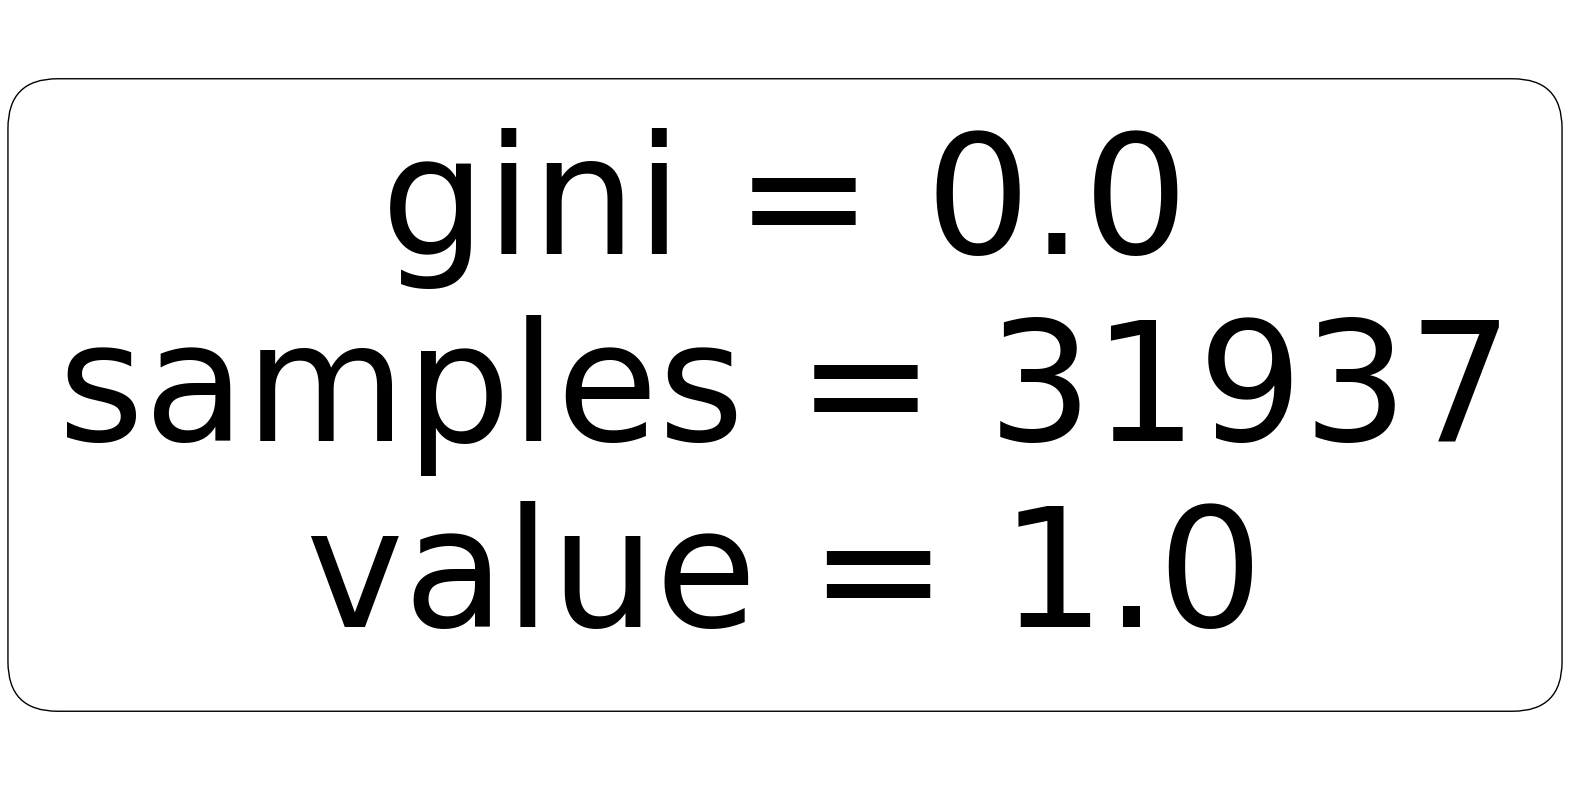

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True
)
plt.show()

The visualization shows how customer attributes influence
subscription decisions through hierarchical splits.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc

(1.0, 1.0)

In [ ]:
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00      7985\n\n    accuracy                           1.00      7985\n   macro avg       1.00      1.00      1.00      7985\nweighted avg       1.00      1.00      1.00      7985\n'

Train Accuracy vs Test Accuracy:

If training accuracy is significantly higher than test accuracy,
the model may be overfitting. Limiting max_depth helps control this.

Key Decision Rules from the Tree:

1. Customers contacted during shorter call durations are less likely to subscribe.
2. Customers with higher balance and successful previous campaigns show higher subscription probability.
3. Campaign outcome and contact type strongly influence final subscription decision.